# Part 3

## Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
from sklearn.datasets import load_digits
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.mixture import GaussianMixture

## On Part-1

In [26]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [29]:
def plot(digits_new):
    new_data = digits_new
    new_data = new_data.reshape((4, 12, -1))
    real_data = digits.data[:48].reshape((4, 12, -1))

    fig, ax = plt.subplots(9, 12, subplot_kw=dict(xticks=[], yticks=[]))
    for j in range(12):
        ax[4, j].set_visible(False)
        for i in range(4):
            im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                                 cmap=plt.cm.binary, interpolation='nearest')
            im.set_clim(0, 16)
            im = ax[i + 5, j].imshow(new_data[i, j].reshape((8, 8)),
                                     cmap=plt.cm.binary, interpolation='nearest')
            im.set_clim(0, 16)

    ax[0, 5].set_title('Inputs digit data')
    ax[5, 5].set_title('Digits after inverse PCA with GMM Model')
    plt.show()

In [5]:
def PCAKDE(n):
    pca = PCA(n, whiten=False)
    data = pca.fit_transform(digits.data)
    params = {'bandwidth': np.logspace(-1, 1, 20)}
    grid = GridSearchCV(KernelDensity(), params, cv=5)
    grid.fit(data)
    print("Best KDE value (Bandwidth) : {0}".format(grid.best_estimator_.bandwidth))
    KDE = grid.best_estimator_
    return KDE,pca

/home/anjul/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best KDE value (Bandwidth) : 3.79269019073225


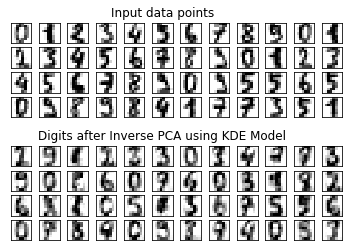

In [6]:
KDE,pca=PCAKDE(16)
newPts = KDE.sample(48, random_state=0)
newPts = pca.inverse_transform(newPts)

newPts = newPts.reshape((4, 12, -1))
real_data = digits.data[:48].reshape((4, 12, -1))
fig, ax = plt.subplots(9, 12, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(12):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(newPts[i, j].reshape((8, 8)),
                                 cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)

ax[0, 5].set_title('Input data points')
ax[5, 5].set_title('Digits after Inverse PCA using KDE Model')
plt.show()

Best KDE value (Bandwidth) : 2.9763514416313175


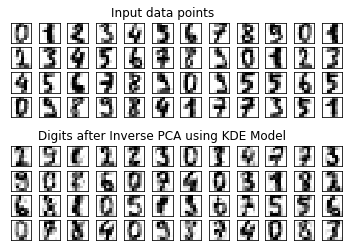

In [7]:
KDE,pca=PCAKDE(28)
newPts = KDE.sample(48, random_state=0)
newPts = pca.inverse_transform(newPts)

newPts = newPts.reshape((4, 12, -1))
real_data = digits.data[:48].reshape((4, 12, -1))
fig, ax = plt.subplots(9, 12, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(12):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(newPts[i, j].reshape((8, 8)),
                                 cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)

ax[0, 5].set_title('Input data points')
ax[5, 5].set_title('Digits after Inverse PCA using KDE Model')
plt.show()

Best KDE value (Bandwidth) : 2.9763514416313175


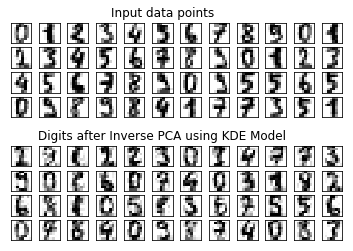

In [8]:
KDE,pca=PCAKDE(39)
newPts = KDE.sample(48, random_state=0)
newPts = pca.inverse_transform(newPts)

newPts = newPts.reshape((4, 12, -1))
real_data = digits.data[:48].reshape((4, 12, -1))
fig, ax = plt.subplots(9, 12, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(12):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(newPts[i, j].reshape((8, 8)),
                                 cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)

ax[0, 5].set_title('Input data points')
ax[5, 5].set_title('Digits after Inverse PCA using KDE Model')
plt.show()

## On Part-2

In [14]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [20]:
def GMMKDE(n):
    pca = PCA(n, whiten=False)
    data = pca.fit_transform(digits.data)
    n_components = np.arange(1, 201, 10)
    models = [GaussianMixture(n, covariance_type='full', random_state=0)
              for n in n_components]
    bics = [model.fit(data).bic(data) for model in models]
    plt.plot(n_components, bics)
    plt.show()
    return data,pca

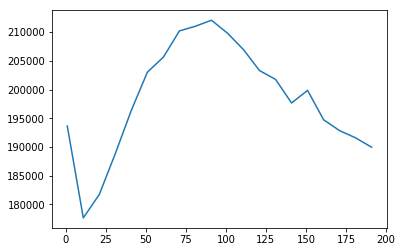

In [21]:
data,pca=GMMKDE(16)

In [22]:
gmm = GaussianMixture(11, covariance_type='full', random_state=0)
gmm.fit(data)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=11, n_init=1, precisions_init=None,
        random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [33]:
data_new1 = gmm.sample(48)
data_new1 = data_new1[0]
digits_new1 = pca.inverse_transform(data_new1)

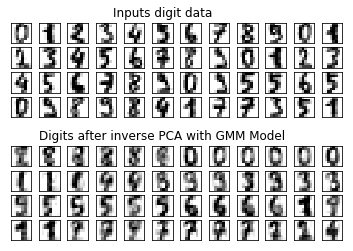

In [35]:
new_data = digits_new1
new_data = new_data.reshape((4, 12, -1))
real_data = digits.data[:48].reshape((4, 12, -1))

fig, ax = plt.subplots(9, 12, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(12):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(new_data[i, j].reshape((8, 8)),
                                 cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)

ax[0, 5].set_title('Inputs digit data')
ax[5, 5].set_title('Digits after inverse PCA with GMM Model')
plt.show()

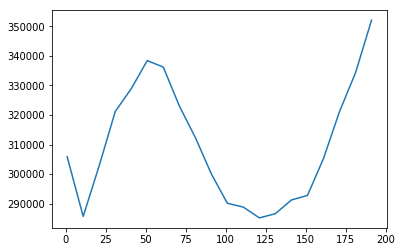

In [36]:
data,pca=GMMKDE(28)

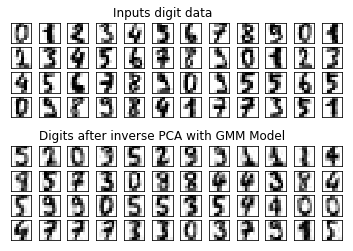

In [37]:
gmm = GaussianMixture(124, covariance_type='full', random_state=0)
gmm.fit(data)
data_new1 = gmm.sample(48)
data_new1 = data_new1[0]
digits_new1 = pca.inverse_transform(data_new1)
new_data = digits_new1
new_data = new_data.reshape((4, 12, -1))
real_data = digits.data[:48].reshape((4, 12, -1))

fig, ax = plt.subplots(9, 12, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(12):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(new_data[i, j].reshape((8, 8)),
                                 cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)

ax[0, 5].set_title('Inputs digit data')
ax[5, 5].set_title('Digits after inverse PCA with GMM Model')
plt.show()

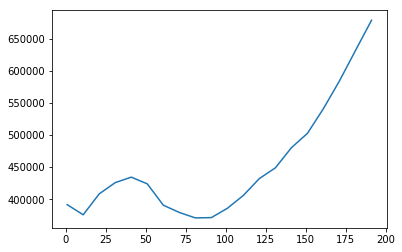

In [38]:
data,pca=GMMKDE(39)

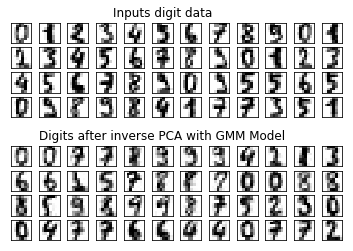

In [39]:
gmm = GaussianMixture(80, covariance_type='full', random_state=0)
gmm.fit(data)
data_new1 = gmm.sample(48)
data_new1 = data_new1[0]
digits_new1 = pca.inverse_transform(data_new1)
new_data = digits_new1
new_data = new_data.reshape((4, 12, -1))
real_data = digits.data[:48].reshape((4, 12, -1))

fig, ax = plt.subplots(9, 12, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(12):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(new_data[i, j].reshape((8, 8)),
                                 cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)

ax[0, 5].set_title('Inputs digit data')
ax[5, 5].set_title('Digits after inverse PCA with GMM Model')
plt.show()